In [143]:
include("../../src/Simulator.jl")

In [148]:
#Generic parameters
n_epochs = 2000000
n_peers = 10000

#I create a basic set of parameters
p1 = Parameters()

#And i customize it with the ones written above
p1.n_epochs = n_epochs
p1.n_peers = n_peers
p1.n_corrupted = 50
p1.p_fail = 0.7
p1.p_join = 0.001
p1.p_leave = 0.001
p1.proof_of_stake = GiniStabilized
p1.initial_stake_volume = 50000.0
p1.initial_distribution = Gini
p1.initial_gini = 0.5
p1.join_amount = NewRandom
p1.penalty_percentage = 0.5
p1.reward = 10.0
p1.s_type = Constant
p1.s_val = 1 / 100.0
p1.θ = 0.3

#I create a basic set of parameters
p2 = Parameters()

#And i customize it with the ones written above
p2.n_epochs = n_epochs
p2.n_peers = n_peers
p2.n_corrupted = 50
p2.p_fail = 0.7
p2.p_join = 0.001
p2.p_leave = 0.001
p2.proof_of_stake = GiniStabilized
p2.initial_stake_volume = 50000.0
p2.initial_distribution = Gini
p2.initial_gini = 0.5
p2.join_amount = NewRandom
p2.penalty_percentage = 0.5
p2.reward = 10.0
p2.s_type = Linear
p2.s_val = 1 / 10.0
p2.θ = 0.3

#I create a basic set of parameters
p3 = Parameters()

#And i customize it with the ones written above
p3.n_epochs = n_epochs
p3.n_peers = n_peers
p3.n_corrupted = 50
p3.p_fail = 0.7
p3.p_join = 0.001
p3.p_leave = 0.001
p3.proof_of_stake = GiniStabilized
p3.initial_stake_volume = 50000.0
p3.initial_distribution = Gini
p3.initial_gini = 0.5
p3.join_amount = NewRandom
p3.penalty_percentage = 0.5
p3.reward = 10.0
p3.s_type = Linear
p3.s_val = 1 / 100.0
p3.θ = 0.3

#I create a basic set of parameters
p4 = Parameters()

#And i customize it with the ones written above
p4.n_epochs = n_epochs
p4.n_peers = n_peers
p4.n_corrupted = 50
p4.p_fail = 0.7
p4.p_join = 0.001
p4.p_leave = 0.001
p4.proof_of_stake = GiniStabilized
p4.initial_stake_volume = 50000.0
p4.initial_distribution = Gini
p4.initial_gini = 0.5
p4.join_amount = NewAverage
p4.penalty_percentage = 0.5
p4.reward = 10.0
p4.s_type = Quadratic
p4.s_val = 1 / 10.0
p4.θ = 0.3

#I create a basic set of parameters
p5 = Parameters()

#And i customize it with the ones written above
p5.n_epochs = n_epochs
p5.n_peers = n_peers
p5.n_corrupted = 50
p5.p_fail = 0.7
p5.p_join = 0.01
p5.p_leave = 0.01
p5.proof_of_stake = GiniStabilized
p5.initial_stake_volume = 50000.0
p5.initial_distribution = Gini
p5.initial_gini = 0.5
p5.join_amount = NewAverage
p5.penalty_percentage = 0.5
p5.reward = 10.0
p5.s_type = Quadratic
p5.s_val = 1 / 100.0
p5.θ = 0.3


parameters = ThreadSafeDict()
parameters[1] = p1
parameters[2] = p2
parameters[3] = p3
parameters[4] = p4
parameters[5] = p5

parameters

ThreadSafeDict{Any, Any} with 5 entries:
  5 => Parameters(2000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  4 => Parameters(2000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  2 => Parameters(2000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  3 => Parameters(2000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  1 => Parameters(2000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …

In [149]:
history_collection = ThreadSafeDict()


@Threads.threads for i in 1 : length(parameters)
    history_collection[i] = simulate(generate_peers(parameters[i].n_peers, 
                        parameters[i].initial_stake_volume, 
                        parameters[i].initial_distribution, 
                        0.5), 
                            rand(1:parameters[i].n_peers, parameters[i].n_corrupted), 
                            parameters[i]);
end

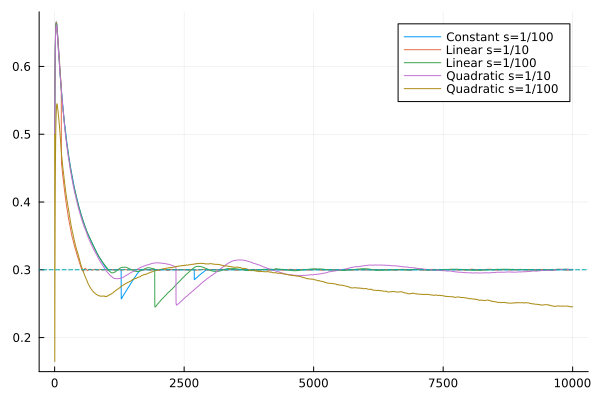

In [151]:
plot(history_collection[1][1:200:end], label="Constant s=1/100")
plot!(history_collection[2][1:200:end], label="Linear s=1/10")
plot!(history_collection[3][1:200:end], label="Linear s=1/100")
plot!(history_collection[4][1:200:end], label="Quadratic s=1/10")
plot!(history_collection[5][1:200:end], label="Quadratic s=1/100")

hline!([0.3], linestyle=:dash, label="")

In [152]:
using DelimitedFiles

# Export the vector to a text file
writedlm("results/1_const.txt", history_collection[1][1:500:end])
writedlm("results/2_linear_1_10.txt", history_collection[2][1:500:end])
writedlm("results/3_linear_1_100.txt", history_collection[3][1:500:end])
writedlm("results/4_quadratic_1_10.txt", history_collection[4][1:500:end])
writedlm("results/5_quadratic_1_100.txt", history_collection[5][1:500:end])